##  <font color= darkred> Import modules and data </font>

In [10]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight") # styling the charts

**Load Data**

In [11]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/conversion_data.csv'

df = pd.read_csv(url)

##  <font color= darkred> Data Inspection</font>

### <font color= darkred> Numerical inspection and summaries </font>

**Data Inspect**

In [12]:
df.head()

country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0

**Missing values check**

In [13]:
df.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


##   <font color= darkred> EDA </font>

### Univariate Analysis

In [15]:
# df['converted'].value_counts(normalize= True).round(4).multiply(100).plot(kind = 'bar');

df['converted'].value_counts(normalize= True).round(4).multiply(100).plot(kind = 'bar', backend = 'plotly')

In [16]:
df['converted'].value_counts(normalize= True).round(4).multiply(100).plot(kind = 'bar', backend = 'plotly')

### Bivariate Analysis

In [17]:
df.describe()

age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000

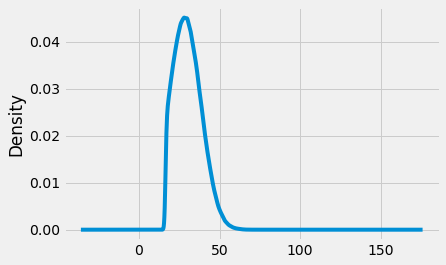

In [18]:
df['age'].plot(kind = 'kde');

In [19]:
df['age'].plot(kind = 'hist',  backend = 'plotly')

**clean the age column**

In [20]:
df.shape

(316200, 6)

In [21]:
df = df.query('age < 95')

**Conversion rate by country**

In [22]:
df.describe(include='object')

country  source
count   316198  316198
unique       4       3
top         US     Seo
freq    178092  155039

In [23]:
df['converted'].mean()

0.03225194340255157

In [24]:
df.groupby('country')['converted'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [25]:
df.groupby('total_pages_visited')['converted'].mean().multiply(100).plot(kind = 'line', backend = 'plotly')

In [26]:
df.groupby('total_pages_visited')['converted'].sum()

total_pages_visited
1        0
2       10
3       11
4       32
5       57
6      104
7      159
8      267
9      402
10     493
11     666
12     884
13     972
14    1064
15     980
16     959
17     780
18     694
19     559
20     404
21     296
22     180
23     113
24      46
25      39
26      17
27       7
28       1
29       2
Name: converted, dtype: int64

In [27]:
df.groupby('total_pages_visited')['converted'].mean().multiply(100)

total_pages_visited
1       0.000000
2       0.022796
3       0.025098
4       0.077961
5       0.156990
6       0.343677
7       0.676941
8       1.523799
9       3.306737
10      6.106776
11     12.347052
12     24.453665
13     40.082474
14     58.752071
15     74.018127
16     87.181818
17     92.307692
18     96.121884
19     98.938053
20     99.753086
21    100.000000
22    100.000000
23    100.000000
24    100.000000
25    100.000000
26    100.000000
27    100.000000
28    100.000000
29    100.000000
Name: converted, dtype: float64

**Conversion rate by source**

In [28]:
df.groupby('source')['converted'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [29]:
x = df.groupby(['country', 'source'])['converted'].mean().multiply(100).reset_index()
x

country  source  converted
0     China     Ads   0.148416
1     China  Direct   0.137433
2     China     Seo   0.122412
3   Germany     Ads   6.675532
4   Germany  Direct   5.342179
5   Germany     Seo   6.390919
6        UK     Ads   5.555967
7        UK  Direct   4.626718
8        UK     Seo   5.390530
9        US     Ads   4.058035
10       US  Direct   3.290855
11       US     Seo   3.850784

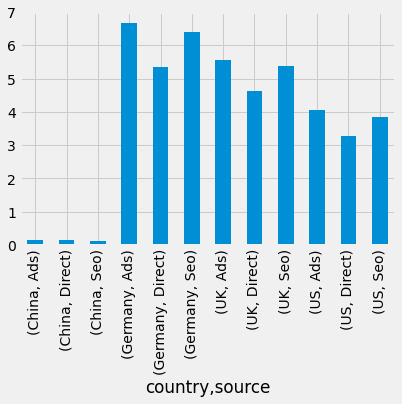

In [30]:
df.groupby(['country', 'source'])['converted'].mean().multiply(100).plot(kind = 'bar');

##  <font color= darkred> Data Prep for Modeling </font>

**Convert categorical value to numerical**

* **One Hot Encoder**  
* **Pandas get dummies**

In [31]:
df.shape

(316198, 6)

In [32]:
pd.get_dummies(df['country']).head()

China  Germany  UK  US
0      0        0   1   0
1      0        0   0   1
2      0        0   0   1
3      1        0   0   0
4      0        0   0   1

In [33]:
pd.get_dummies(df['country'], drop_first= True).head()

Germany  UK  US
0        0   1   0
1        0   0   1
2        0   0   1
3        0   0   0
4        0   0   1

In [34]:
df2 = pd.get_dummies(df, drop_first=True)
df2

age  new_user  total_pages_visited  converted  country_Germany  \
0        25         1                    1          0                0   
1        23         1                    5          0                0   
2        28         1                    4          0                0   
3        39         1                    5          0                0   
4        30         1                    6          0                0   
...     ...       ...                  ...        ...              ...   
316195   26         1                    9          0                0   
316196   27         1                    6          0                0   
316197   25         0                    4          0                0   
316198   22         0                    4          0                0   
316199   24         0                    4          0                0   

        country_UK  country_US  source_Direct  source_Seo  
0                1           0              0           0  
1                0           1              0           1  
2                0           1              0           1  
3                0           0              0           1  
4                0           1              0           1  
...            ...         ...            ...         ...  
316195           0           1              0           0  
316196           0           1              1           0  
316197           0           0              0           0  
316198           0           1              0           1  
316199           1           0              0           0  

[316198 rows x 9 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316198 non-null  object
 1   age                  316198 non-null  int64 
 2   new_user             316198 non-null  int64 
 3   source               316198 non-null  object
 4   total_pages_visited  316198 non-null  int64 
 5   converted            316198 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


**Train-Test Split**

In [36]:
# data prep
from sklearn.model_selection import train_test_split

In [37]:
# splitting the data 
X = df2.drop(columns = 'converted')
y = df2['converted']

In [38]:
# # doing train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [39]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)


print("\n")

print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

display(x_train.head())
display(y_train.head())


x_train:  (252958, 8)
y_train:  (252958,)


x_test:  (63240, 8)
y_test:  (63240,)


age  new_user  total_pages_visited  country_Germany  country_UK  \
246592   41         1                    3                0           0   
181971   21         1                    1                0           0   
253875   29         0                    2                0           0   
92054    40         0                    1                0           0   
78028    30         1                    2                0           0   

        country_US  source_Direct  source_Seo  
246592           1              0           1  
181971           1              0           0  
253875           0              0           1  
92054            0              0           0  
78028            1              0           0

246592    0
181971    0
253875    0
92054     0
78028     0
Name: converted, dtype: int64

## <font color= darkred> Model building </font> 💥⚡

### Dummy classifier model using [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

In [40]:
from sklearn.dummy import DummyClassifier

In [41]:
dummy = DummyClassifier()

In [42]:
dummy.fit(x_train, y_train)

DummyClassifier()

In [43]:
print("The accuracy score of the model for Train is {:.2f}".format(dummy.score(x_train, y_train)))

The accuracy score of the model for Train is 0.97


In [44]:
print("The accuracy score of the model for Test is {:.2f}".format(dummy.score(x_test, y_test)))

The accuracy score of the model for Test is 0.97


### k-nn model using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

# fit the model 
knn.fit(x_train, y_train)

KNeighborsClassifier()

**Train data predictions**

In [47]:
print("The accuracy score of the model for Train is {:.2f}".format(knn.score(x_train, y_train)))

The accuracy score of the model for Train is 0.99


In [49]:
train_predictions =knn.predict(x_train)

**Test Data Predictions**

In [50]:
print("The accuracy score of the model for test is {:.2f}".format(knn.score(x_test, y_test)))

The accuracy score of the model for test is 0.99


# SMOTE and classification report

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



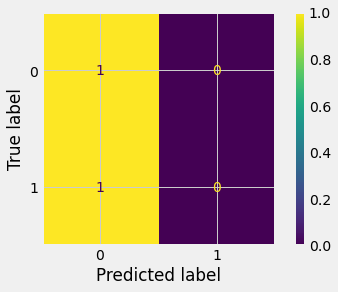

In [52]:
plot_confusion_matrix(estimator = dummy, X= x_test, y_true = y_test, normalize= 'true' )

In [53]:
y_train.value_counts(normalize=True)

0    0.967718
1    0.032282
Name: converted, dtype: float64

In [54]:
from imblearn.over_sampling import SMOTE, SMOTENC

In [55]:
df.tail()

country  age  new_user  source  total_pages_visited  converted
316195      US   26         1     Ads                    9          0
316196      US   27         1  Direct                    6          0
316197   China   25         0     Ads                    4          0
316198      US   22         0     Seo                    4          0
316199      UK   24         0     Ads                    4          0

In [56]:
df2.head()

age  new_user  total_pages_visited  converted  country_Germany  country_UK  \
0   25         1                    1          0                0           1   
1   23         1                    5          0                0           0   
2   28         1                    4          0                0           0   
3   39         1                    5          0                0           0   
4   30         1                    6          0                0           0   

   country_US  source_Direct  source_Seo  
0           0              0           0  
1           1              0           1  
2           1              0           1  
3           0              0           1  
4           1              0           1

In [57]:
x_train.head()

age  new_user  total_pages_visited  country_Germany  country_UK  \
246592   41         1                    3                0           0   
181971   21         1                    1                0           0   
253875   29         0                    2                0           0   
92054    40         0                    1                0           0   
78028    30         1                    2                0           0   

        country_US  source_Direct  source_Seo  
246592           1              0           1  
181971           1              0           0  
253875           0              0           1  
92054            0              0           0  
78028            1              0           0

In [58]:
sm = SMOTENC(categorical_features= [3,4,5,6,7]
             ,random_state= 2)
                                    
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
y_train_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: converted, dtype: float64

In [59]:
y_train_sm.value_counts()

0    244792
1    244792
Name: converted, dtype: int64

## dummy2 fit smotenc

In [60]:
dummy2 = DummyClassifier(random_state=1)
dummy2.fit(x_train_sm, y_train_sm)
predictions2 = dummy2.predict(x_train_sm)

In [61]:
dummy2.score(x_test,y_test)

0.9678684376976597

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



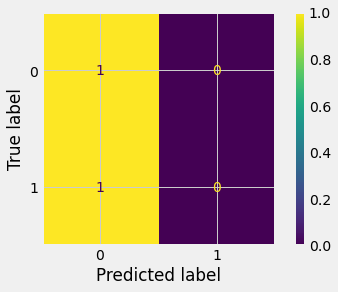

In [62]:
plot_confusion_matrix(dummy2, X= x_test, y_true = y_test, normalize= 'true' )

## Kneighbours SMOTENC

In [63]:
knn2 = KNeighborsClassifier()
knn2.fit(x_train_sm,y_train_sm)
knn_predict = knn2.predict(x_train_sm)

In [64]:
knn2.score(x_train_sm,y_train_sm)

0.8799000784339357

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



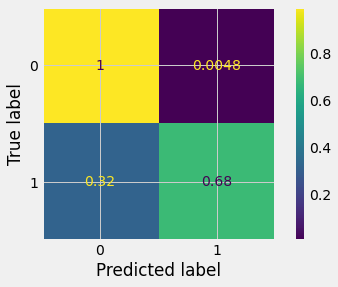

In [65]:
plot_confusion_matrix(knn, X= x_test, y_true = y_test, normalize= 'true' )

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



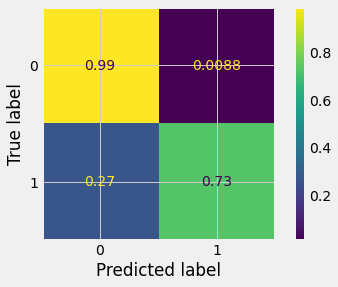

In [66]:
plot_confusion_matrix(knn2, X= x_test, y_true = y_test, normalize= 'true' )

In [67]:
print(classification_report(y_train_sm,knn_predict))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    244792
           1       0.99      0.77      0.86    244792

    accuracy                           0.88    489584
   macro avg       0.90      0.88      0.88    489584
weighted avg       0.90      0.88      0.88    489584



### Decision Trees model using [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier()

# fit the model 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [70]:
print("The accuracy score of the model for Train is {:.2f}".format(dt.score(x_train, y_train)))

The accuracy score of the model for Train is 0.99


In [71]:
print("The accuracy score of the model for test is {:.2f}".format(dt.score(x_test, y_test)))

The accuracy score of the model for test is 0.98


## Random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()

# fit the model 
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [75]:
print("The accuracy score of the model for Train is {:.2f}".format(rf.score(x_train, y_train)))

The accuracy score of the model for Train is 0.95


In [76]:
print("The accuracy score of the model for test is {:.2f}".format(rf.score(x_test, y_test)))

The accuracy score of the model for test is 0.95
